In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv

headers = ['datetime','instanceId','maxCPUPercent']
data = '/home/joe/data/aws/out.txt'
df = pd.read_csv(data, names=headers)

In [8]:
df.head(2)

,datetime,instanceId,maxCPUPercent
0,2020-03-23 20:40:00+00:00,i-0ca364ec6656ff517,0.169492
1,2020-03-23 22:45:00+00:00,i-0ca364ec6656ff517,0.166667


In [78]:
df.describe()

,maxCPUPercent
count,127.000000
mean,2.065994
std,3.899760
min,0.163934
25%,0.166667
50%,0.169492
75%,3.333333
max,33.166667


In [79]:
dfG = df.groupby('instanceId')['maxCPUPercent'].mean()
dfG

instanceId
i-089389afc8097dac4    0.501436
i-09f0182499b5eaf27    4.235662
i-0ca364ec6656ff517    0.514968
Name: maxCPUPercent, dtype: float64

In [80]:
instances = df.instanceId.unique()
instances

array(['i-0ca364ec6656ff517', 'i-09f0182499b5eaf27',
       'i-089389afc8097dac4'], dtype=object)

In [93]:
dfP = df.pivot(index=df['datetime'], columns='instanceId')['maxCPUPercent']
dfP = dfP.fillna(0)
dfP = dfP.reset_index()
dfP['datetime'] = pd.to_datetime(dfP['datetime'])
dfP.head(4)
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   datetime             60 non-null     datetime64[ns, UTC]
 1   i-089389afc8097dac4  60 non-null     float64            
 2   i-09f0182499b5eaf27  60 non-null     float64            
 3   i-0ca364ec6656ff517  60 non-null     float64            
dtypes: datetime64[ns, UTC](1), float64(3)
memory usage: 2.0 KB


<BarContainer object of 60 artists>

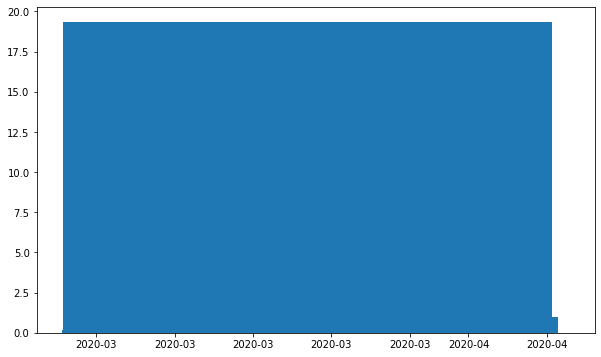

In [94]:
#fig = plt.figure(figsize=(10,10))
#ax = fig.subplots()
#ax.set_title("AWS EC2 Instance CPU Utilizations", fontsize=20)
#ax.set_ylabel('CPU Max Percentages', color='black',fontsize=18)

#dt = pd.to_datetime(dfP['datetime'])
#ax.plot(pd.to_datetime(dfP['datetime']),dfP['i-0ca364ec6656ff517'],color='blue')
#ax.plot(pd.to_datetime(dfP['datetime']),dfP['i-09f0182499b5eaf27'],color='red')
#ax.set_xticks(pd.to_datetime(dfP['datetime'])


